<a href="https://colab.research.google.com/github/SethupathyM/Supervised_ML_Classification_Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_recall_curve,auc,classification_report,roc_curve,auc
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

import math

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [280]:
# Reading the CSV file
df = pd.read_csv('/content/Mydrive/MyDrive/Captone_Project_Supervised_ML_Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv')

In [281]:
data = df

In [282]:
# Shape
df.shape

(3390, 17)

In [283]:
data.shape

(3390, 17)

In [284]:
# Head
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [285]:
# Tail
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [286]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [287]:
# Duplicates
df.duplicated().sum()

0

In [288]:
# Null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [289]:
# Replacing 'M' with 1 and 'F' with 0 in 'sex' variable

df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)

# Replacing 'YES' with 1 and 'NO' with 0 in 'is_smoking' variable

df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)


In [290]:
# Treating NULL values
# 'education'
df['education'].fillna(0,inplace = True)
df.groupby('education').agg({'age':'mean'})
# print(df.groupby('education').agg({'age':'mean'}))
# From this we can replace education '0' with '1' because based on the average the education varies.
df['education'] = df['education'].apply(lambda x : 1 if x == 0 else x)

# 'cigsPerDay'
df[df['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'})
# print(df[df['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'}))
# As the average number of cigarettes consumed by Females is 14 and Males is 22
df.loc[ (df.sex == 0) & (df['cigsPerDay'].isna()), 'cigsPerDay'] =  14
df.loc[ (df.sex == 1) & (df['cigsPerDay'].isna()), 'cigsPerDay'] =  22

# 'totChol'
df['totChol'].fillna(int(df['totChol'].mean()), inplace = True)

# 'BMI'
df['BMI'].fillna(int(df['BMI'].mean()), inplace = True)

# 'Heart rate'
df['heartRate'].fillna(int(df['heartRate'].mean()), inplace = True)


# 'glucose'
df.groupby('diabetes').agg({'glucose':'mean'})
# print(df.groupby('diabetes').agg({'glucose':'mean'}))
# Average Glucose level of Patients without Diabetes is 79 and with Diabetes is 172
df.loc[ (df.diabetes == 0) & (df['glucose'].isna()), 'glucose'] =  79
df.loc[ (df.diabetes == 1) & (df['glucose'].isna()), 'glucose'] =  172

# 'BPMeds'
df.loc[(df.prevalentHyp == 1) & (df['BPMeds'].isna()), 'BPMeds'] =  1

In [291]:
# Droping the rows with 'BPMeds' as Nan value
df = df.dropna()
df.shape

(3365, 17)

In [292]:
# Summary
round(df.describe([0.95,0.99],include = 'all'),2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3365.00,3365.00,3365.00,3365.00,3365.0,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00
mean,1695.31,49.53,1.95,0.43,0.5,9.11,0.04,0.01,0.32,0.03,237.12,132.67,82.93,25.80,75.98,81.92,0.15
std,978.64,8.59,1.02,0.50,0.5,11.85,0.18,0.08,0.47,0.16,44.98,22.34,12.04,4.11,11.99,23.37,0.36
min,0.00,32.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
50%,1694.00,49.00,2.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,235.00,128.50,82.00,25.38,75.00,79.00,0.00
95%,3219.80,64.00,4.00,1.00,1.0,30.00,0.00,0.00,1.00,0.00,313.00,175.90,105.00,32.84,98.00,108.00,1.00
99%,3355.36,67.00,4.00,1.00,1.0,43.00,1.00,0.00,1.00,1.00,354.36,202.18,119.36,38.87,110.00,173.00,1.00
max,3389.00,70.00,4.00,1.00,1.0,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


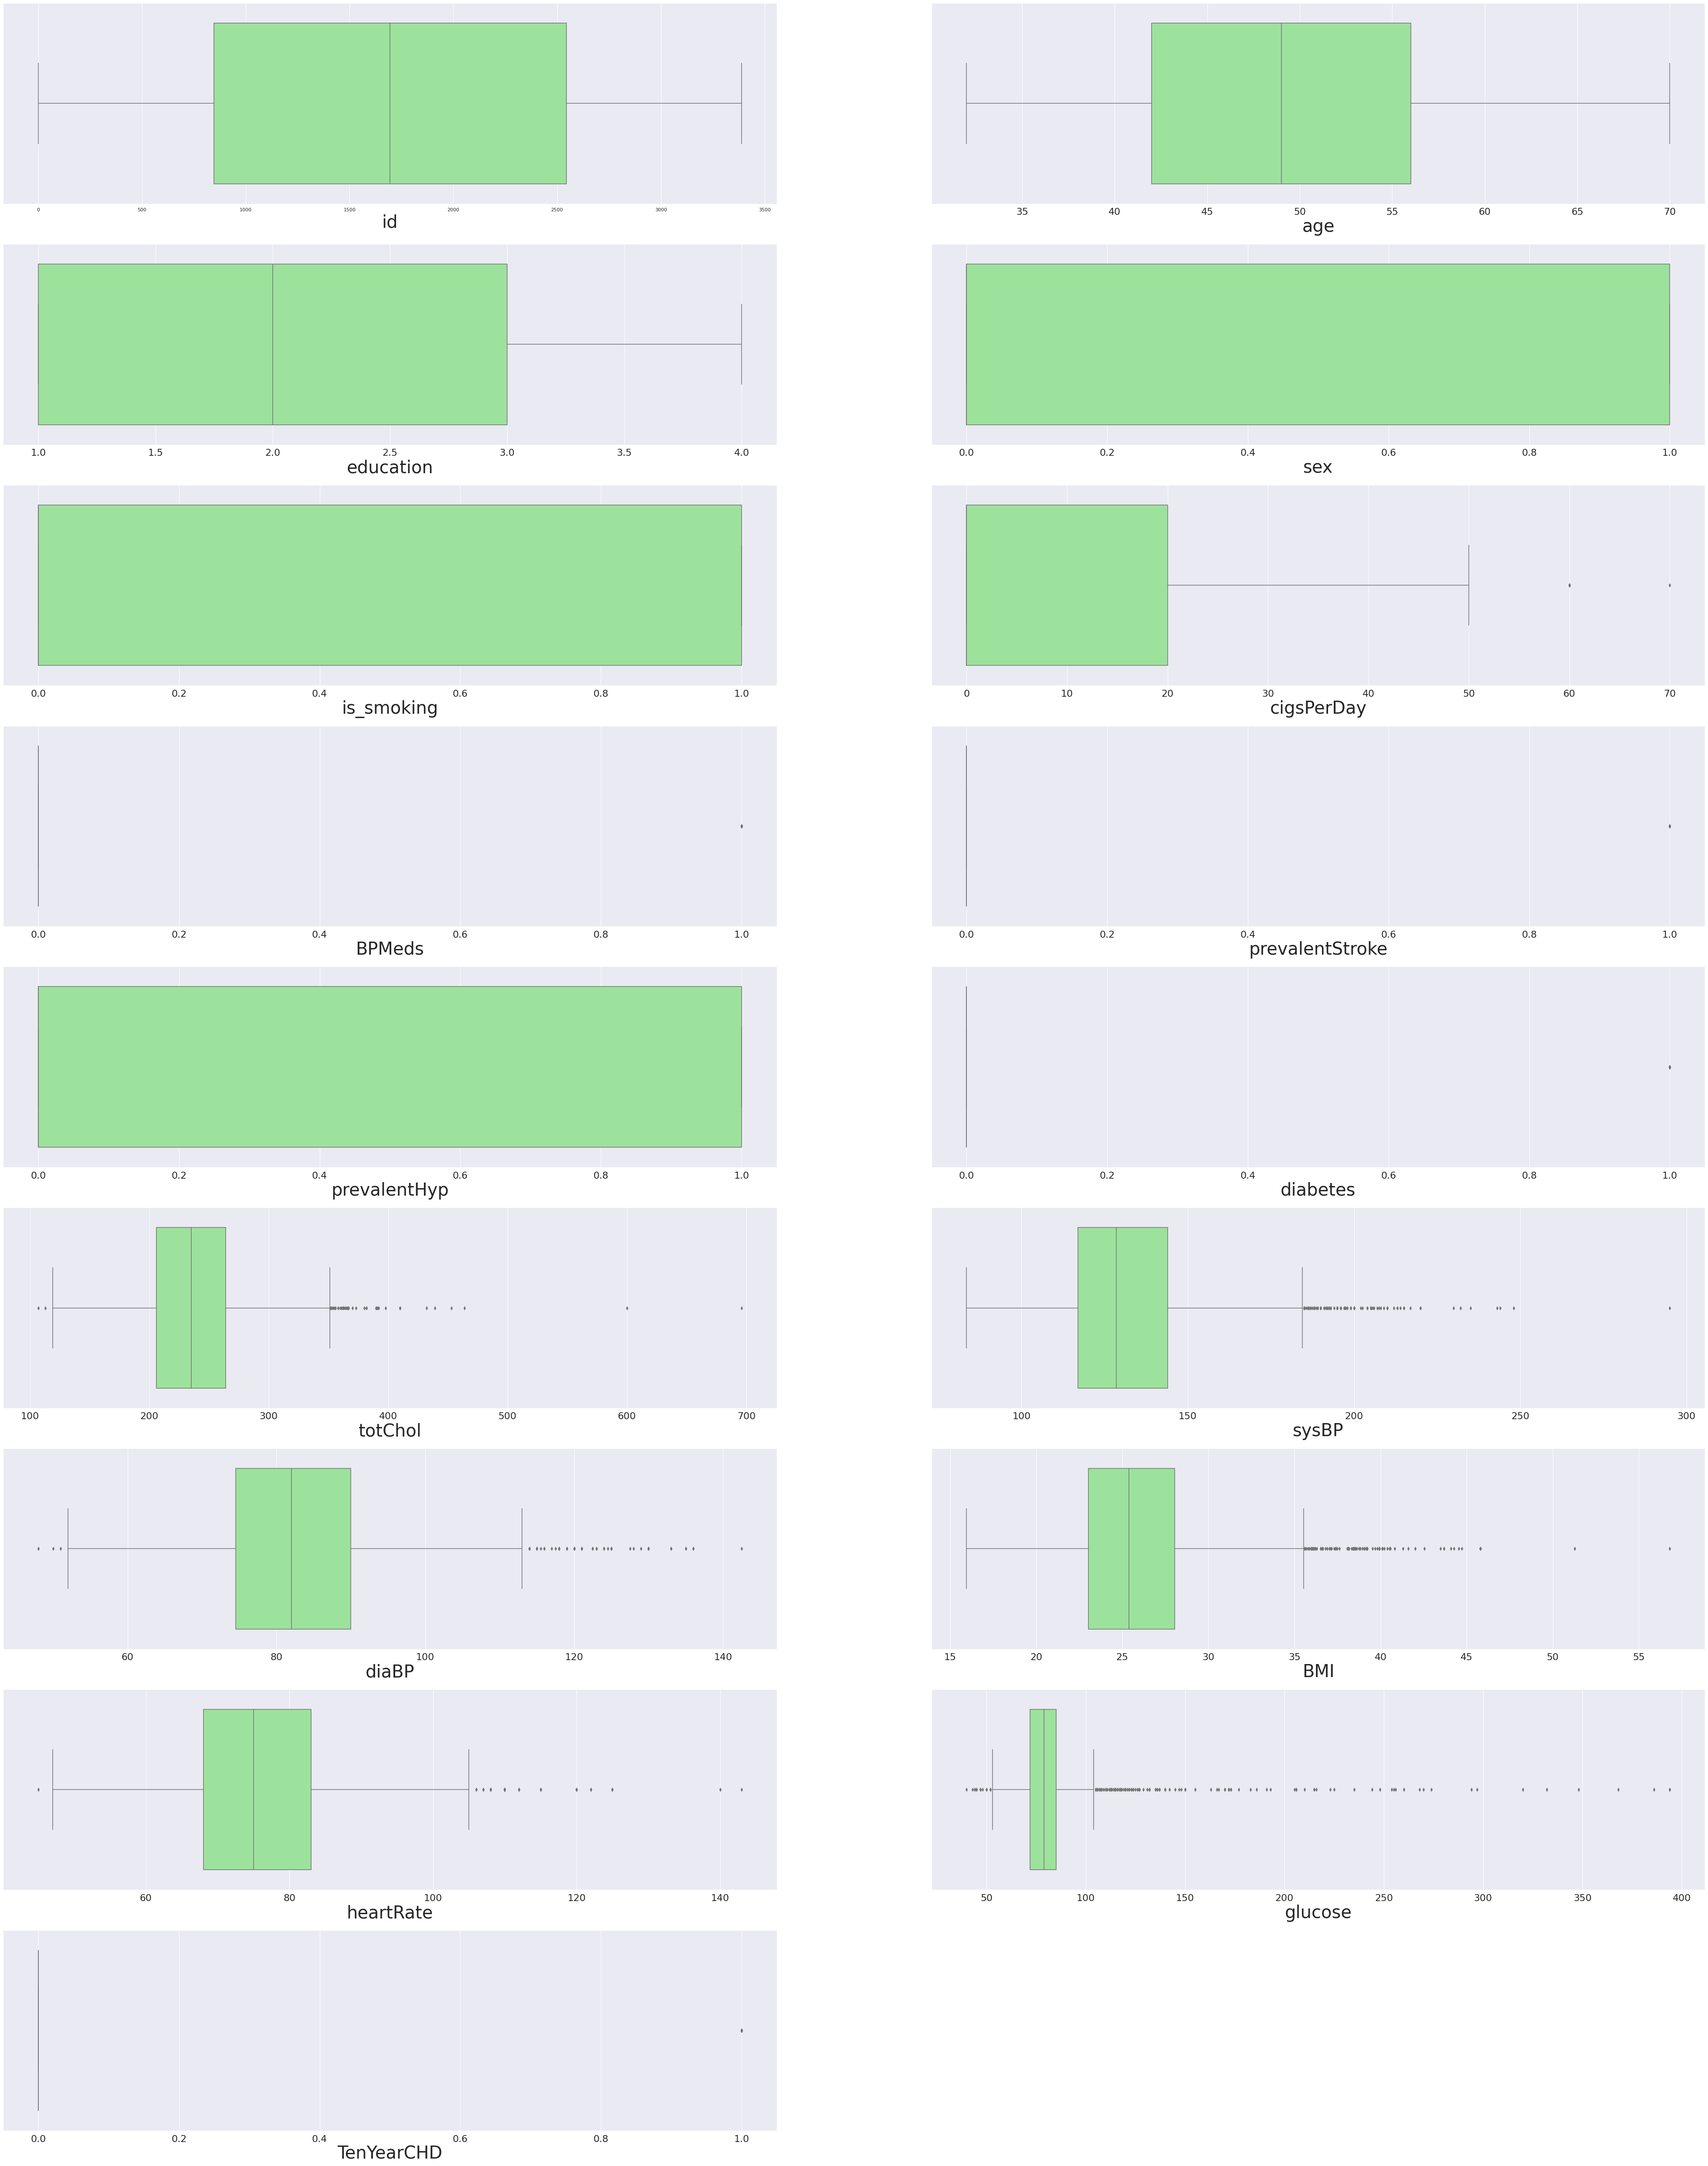

In [293]:
# Box plot to detect outliers

lst_box = df.describe().columns
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df[i[1]],color='lightgreen')
    plt.xlabel(i[1],fontsize=40)

In [294]:
# Z Score based technique to remove outliers
lst = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for i in lst:
  lower_limit = df[i].mean() - 3*df[i].std()
  print(i+'Lower_limit:',round(lower_limit,2))  
  upper_limit = df[i].mean() + 3*df[i].std()
  print(i+'Upper_limit:',round(upper_limit,2))
  df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

cigsPerDayLower_limit: -26.46
cigsPerDayUpper_limit: 44.67
totCholLower_limit: 102.2
totCholUpper_limit: 372.05
sysBPLower_limit: 65.66
sysBPUpper_limit: 199.69
diaBPLower_limit: 46.81
diaBPUpper_limit: 119.04
BMILower_limit: 13.48
BMIUpper_limit: 38.12
heartRateLower_limit: 40.02
heartRateUpper_limit: 111.95
glucoseLower_limit: 11.8
glucoseUpper_limit: 152.04


In [295]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

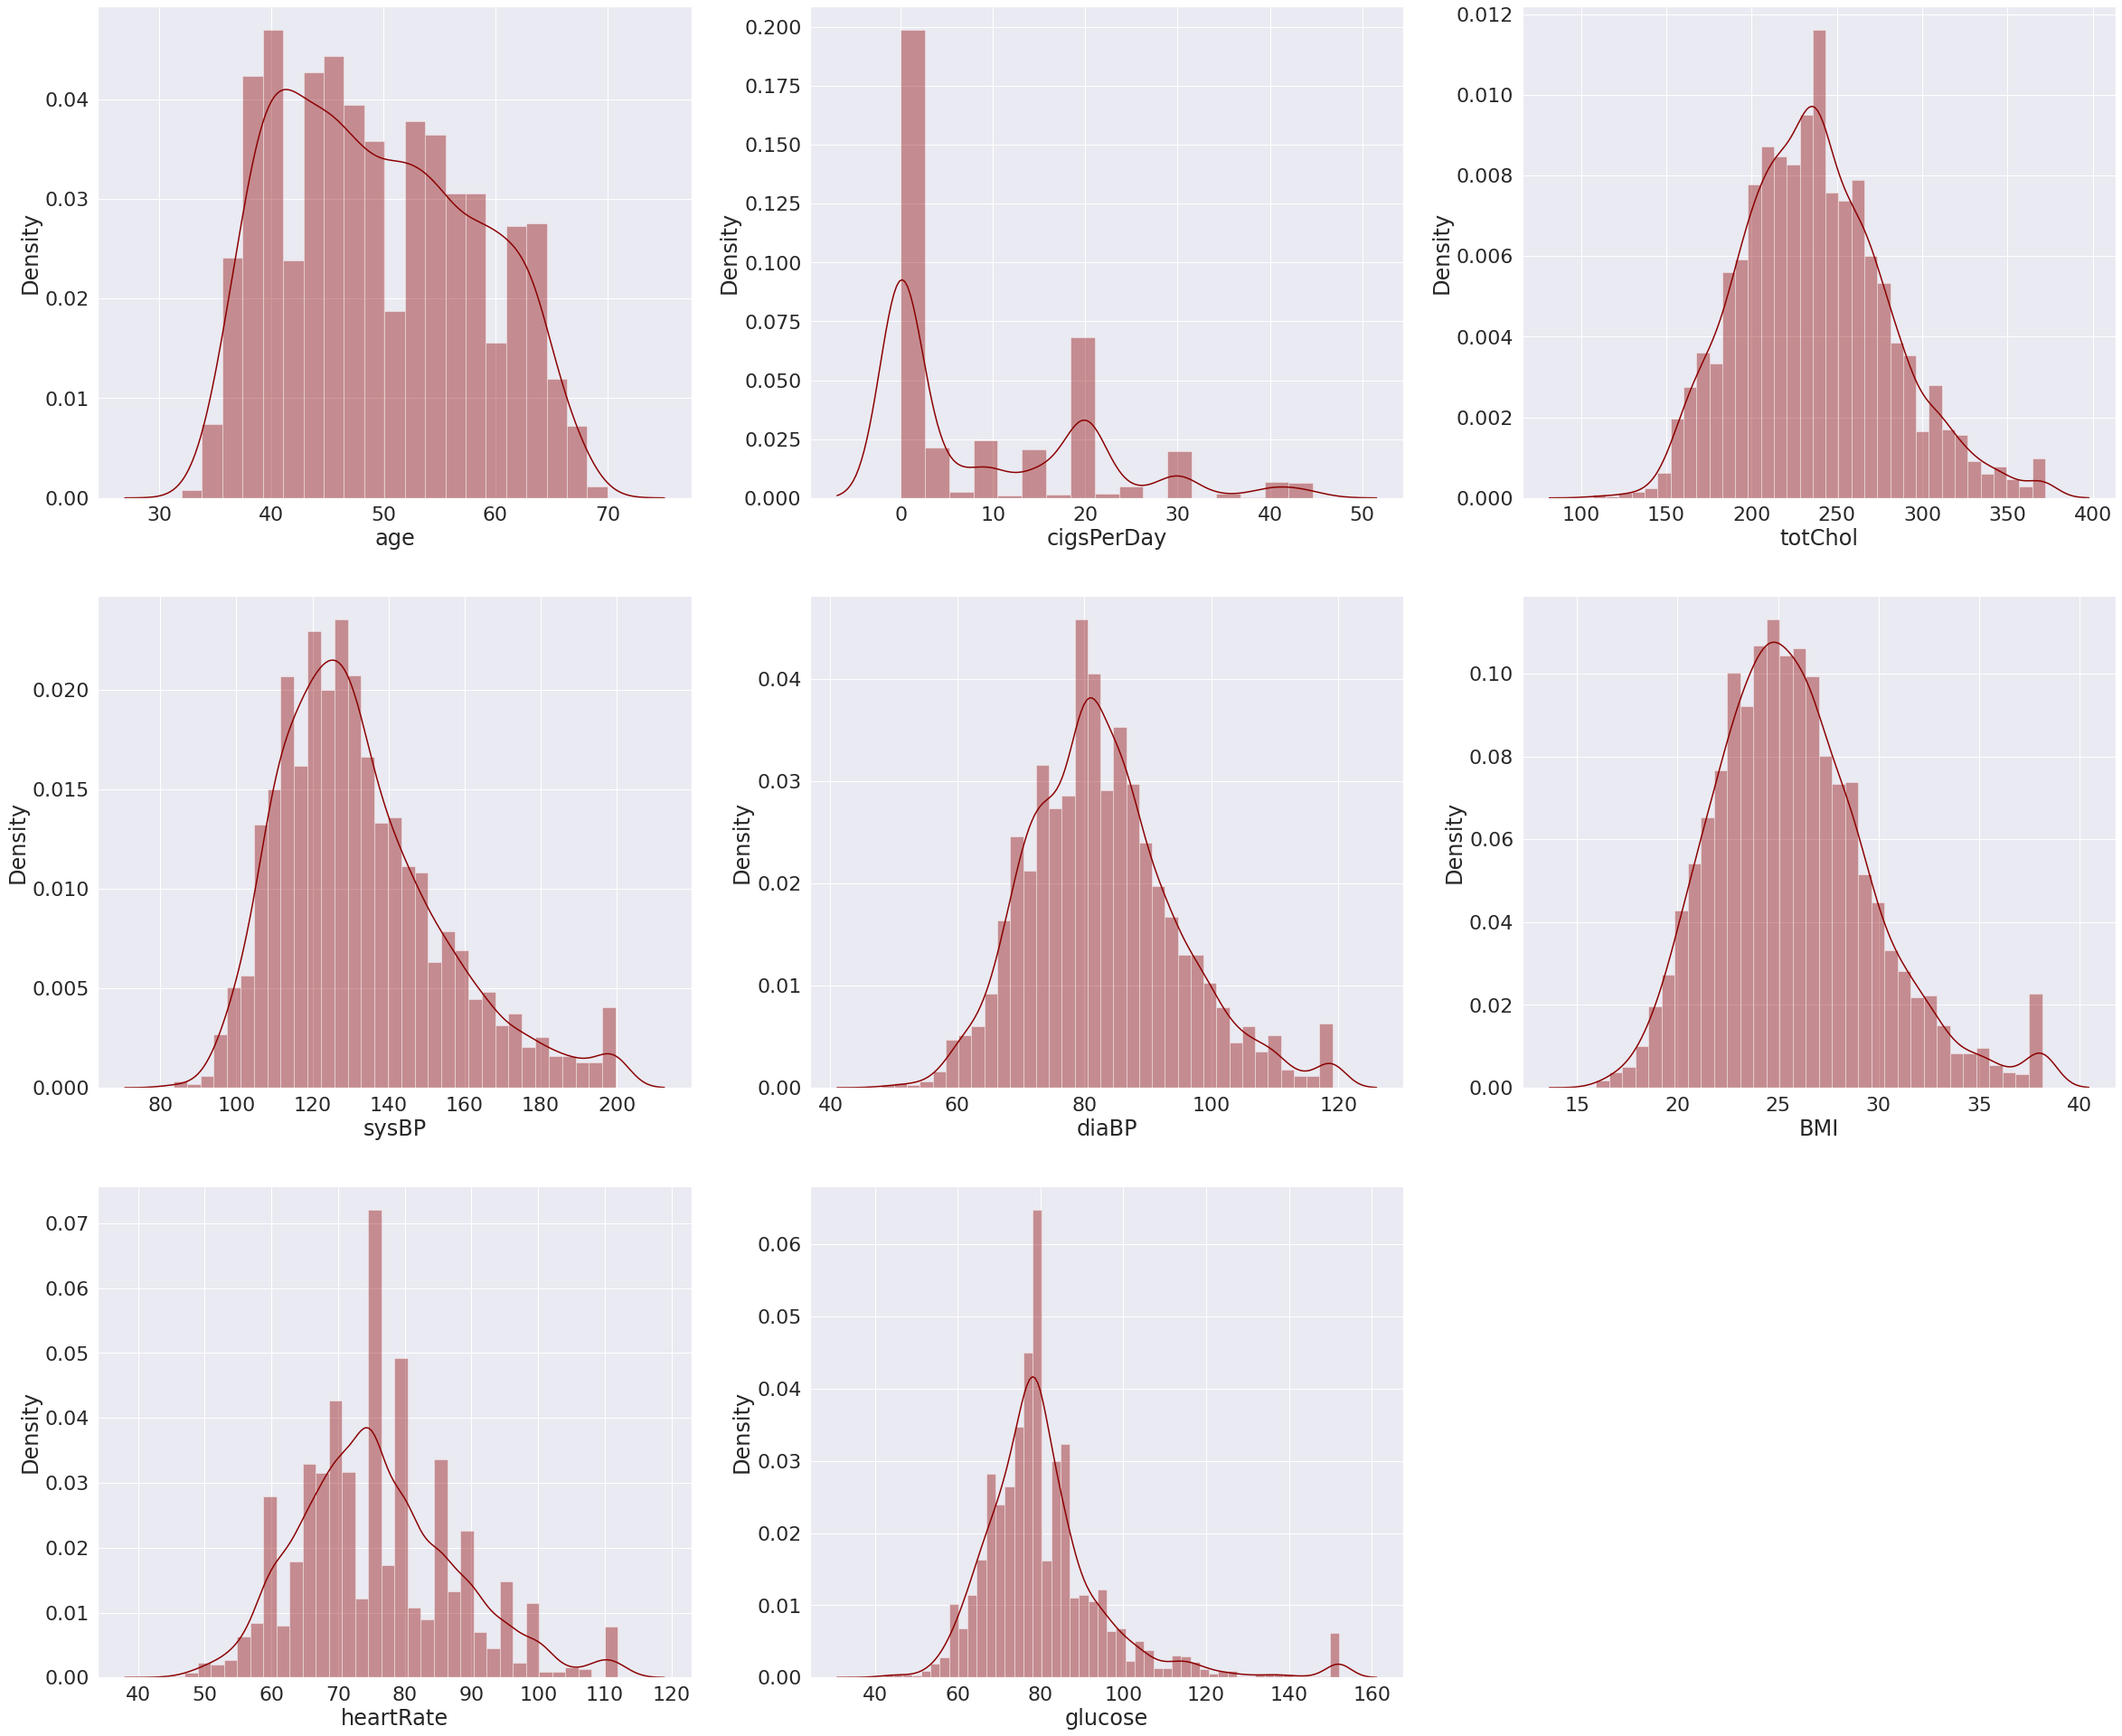

In [296]:
# Distribution plot for numerical variables
lst_dist = ['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
  sns.set(font_scale = 2)
  plt.subplot(6, 3,i[0]+1)
  sns.distplot(df[i[1]],color = 'darkred')

In [297]:
# Values counts
lst_cate = ['sex', 'is_smoking','prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
for col in lst_cate:
  print(df[col].value_counts())

0    1904
1    1461
Name: sex, dtype: int64
0    1694
1    1671
Name: is_smoking, dtype: int64
0    3343
1      22
Name: prevalentStroke, dtype: int64
0    2296
1    1069
Name: prevalentHyp, dtype: int64
0    3278
1      87
Name: diabetes, dtype: int64
0    2856
1     509
Name: TenYearCHD, dtype: int64


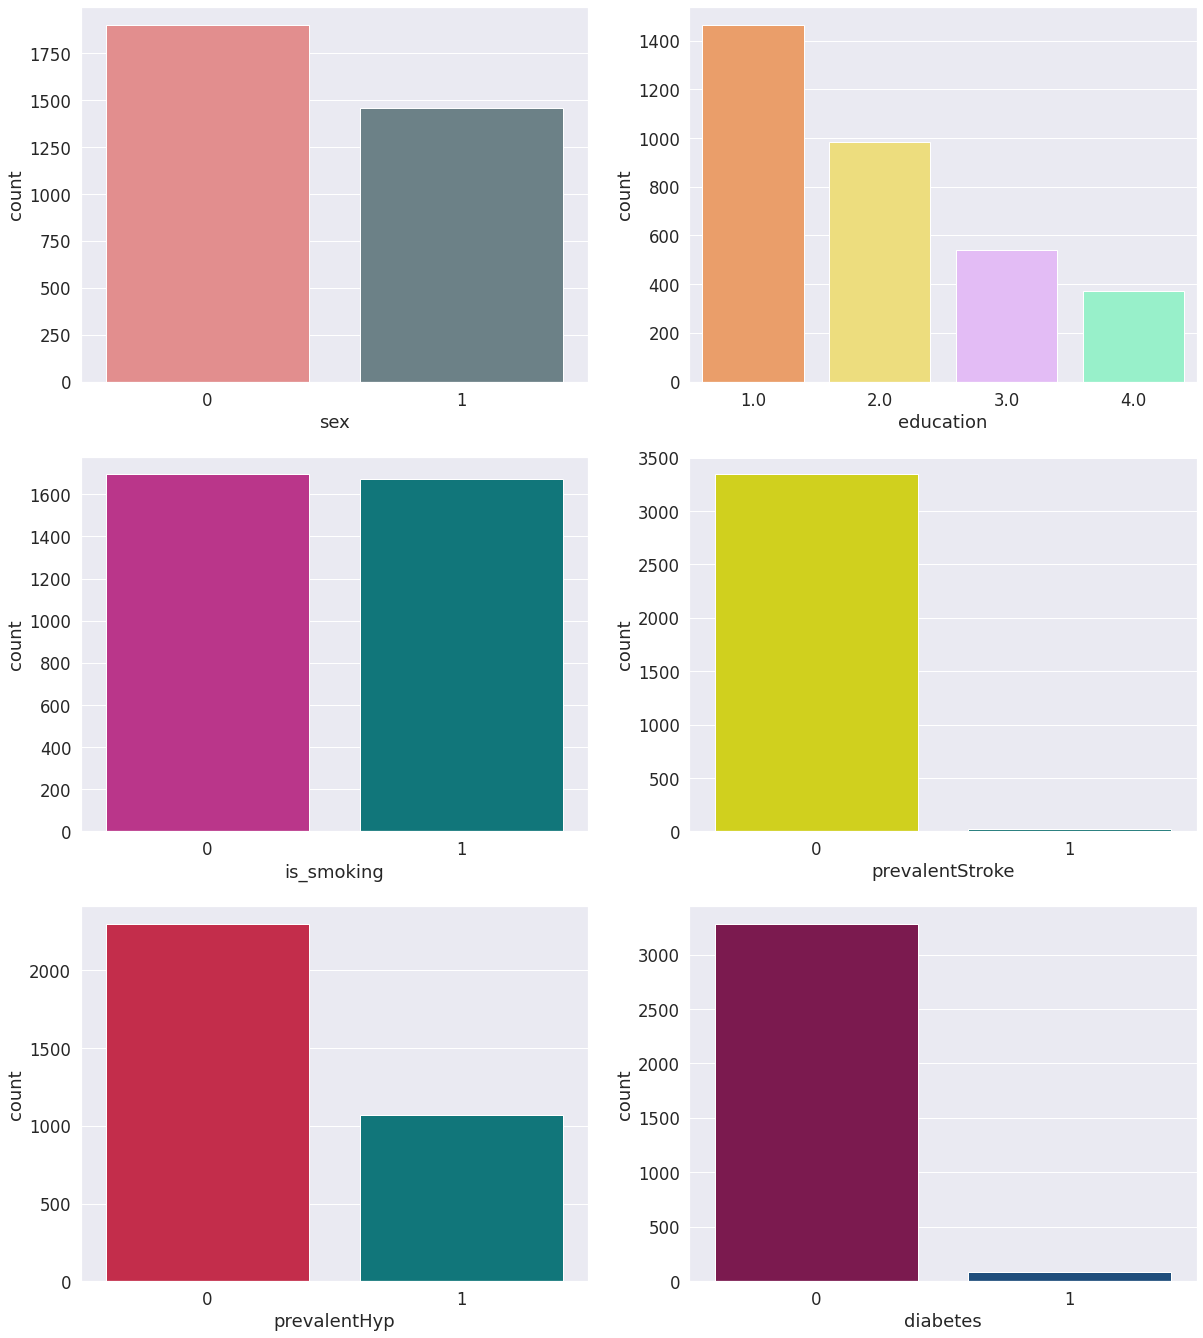

In [298]:
# Value counts Plot
categorical_var_count = ['sex', 'education', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes']
plt.figure(figsize = (20,40))
sns.set_theme()
color = [['#F08080','#68838B'],['#ff9a55','#ffea6c','#e7b2ff','#89ffcc'],['#D02090','#00868B'],['#EEEE00','#008080'],['#DC143C','#00868B'],['#8B0A50','#104E8B']]
for i in enumerate(categorical_var_count):
  sns.set(font_scale = 1.5)
  plt.subplot(5, 2,i[0]+1)
  sns.countplot(data = df, x = df[i[1]],palette= color[i[0]])

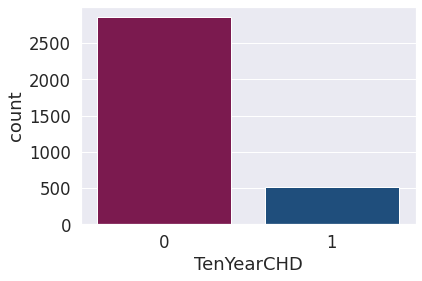

In [299]:
# Count plot for dependent variable
sns.countplot(data = df, x = 'TenYearCHD',palette= color[i[0]])

In [300]:
# Average of numeric independent variables with dependent variable
no_risk_avg_lst = []
risk_avg_lst = []
col_lst = ['totChol','age','cigsPerDay','BMI','sysBP','heartRate','glucose','diaBP']
xticks_lst = ['Total cholesterol level','Age','Cigarette per day','BMI','Systolic blood pressure ','Heart Rate','Glucose',' Diastolic blood pressure']
for col in col_lst:
  no_risk_avg = df[df['TenYearCHD'] == 0].groupby('TenYearCHD').agg({col:'mean'}).reset_index()
  # print(no_risk_avg.iloc[0,1])
  no_risk_avg_lst.append(round(no_risk_avg.iloc[0,1],2))
  risk_avg = df[df['TenYearCHD'] == 1].groupby('TenYearCHD').agg({col:'mean'}).reset_index()
  # print(risk_avg.iloc[0,1])
  risk_avg_lst.append(round(risk_avg.iloc[0,1],2))
# print(no_risk_avg_lst)
# print(risk_avg_lst)

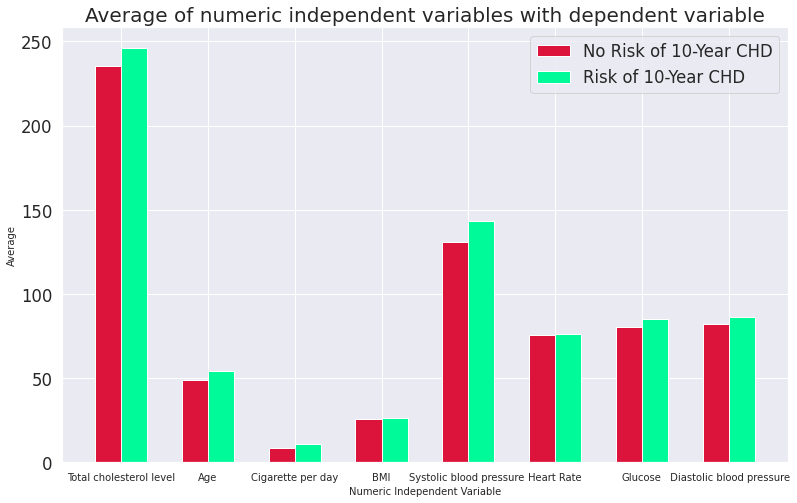

In [301]:
# Plotting average of numeric independent variables with dependent variable
bar1_list = no_risk_avg_lst
bar2_list = risk_avg_lst

width_of_RandA_rooms = 0.3
bar1 = np.arange(len(col_lst))
bar2 = [i + width_of_RandA_rooms for i in bar1]

plt.figure(figsize= (13,8))
plt.bar(bar1,bar1_list,width_of_RandA_rooms,color = 'crimson', label = 'No Risk of 10-Year CHD')
plt.bar(bar2,bar2_list,width_of_RandA_rooms,color = 'mediumspringgreen', label = 'Risk of 10-Year CHD')
plt.xlabel('Numeric Independent Variable',fontsize = 10)
plt.ylabel('Average',fontsize = 10)
plt.title('Average of numeric independent variables with dependent variable',fontsize = 20)
plt.xticks(bar1+width_of_RandA_rooms/2,xticks_lst,fontsize = 10)
plt.legend()
plt.show()

In [302]:
# Count of Categorical independent variables with dependent variable
no_risk_avg_lsts = []
risk_avg_lsts = []
col_lsts = ['is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
xticks_lsts = ['Blood Pressure Medication','Is Smoking','Previously had a stroke ','Diabetes','Patient was Hypertensive']
for cols in col_lsts:
  no_risk_avgs = df[df['TenYearCHD'] == 0].groupby('TenYearCHD').agg({cols:'count'}).reset_index()
  # print(no_risk_avgs.iloc[0,1])
  no_risk_avg_lsts.append(round(no_risk_avgs.iloc[0,1],2))
  risk_avgs= df[df['TenYearCHD'] == 1].groupby('TenYearCHD').agg({cols:'count'}).reset_index()
  # print(risk_avgs.iloc[0,1])
  risk_avg_lsts.append(round(risk_avgs.iloc[0,1],2))
# print(no_risk_avg_lsts)
# print(risk_avg_lsts)

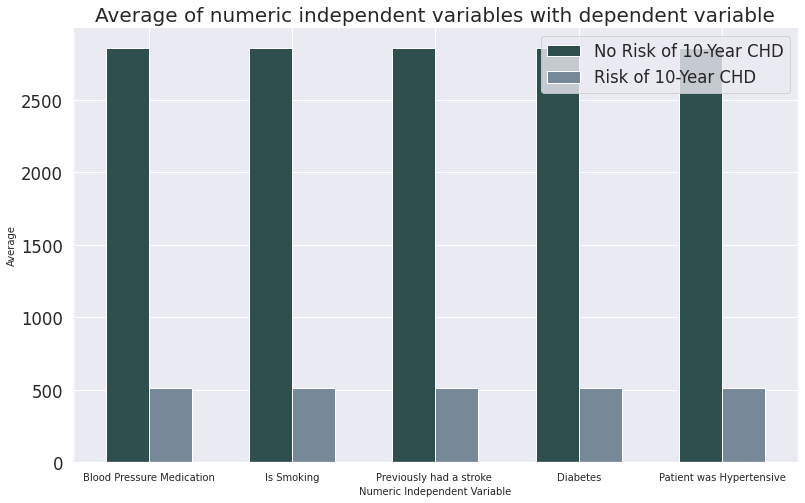

In [303]:
# Plotting the count of Categorical independent variables with dependent variable
bar1_list = no_risk_avg_lsts
bar2_list = risk_avg_lsts

width_of_RandA_rooms = 0.3
bar1 = np.arange(len(col_lsts))
bar2 = [i + width_of_RandA_rooms for i in bar1]

plt.figure(figsize= (13,8))
plt.bar(bar1,bar1_list,width_of_RandA_rooms,color = 'darkslategray', label = 'No Risk of 10-Year CHD')
plt.bar(bar2,bar2_list,width_of_RandA_rooms,color = 'lightslategray', label = 'Risk of 10-Year CHD')
plt.xlabel('Numeric Independent Variable',fontsize = 10)
plt.ylabel('Average',fontsize = 10)
plt.title('Average of numeric independent variables with dependent variable',fontsize = 20)
plt.xticks(bar1+width_of_RandA_rooms/2,xticks_lsts,fontsize = 10)
plt.legend()
plt.show()

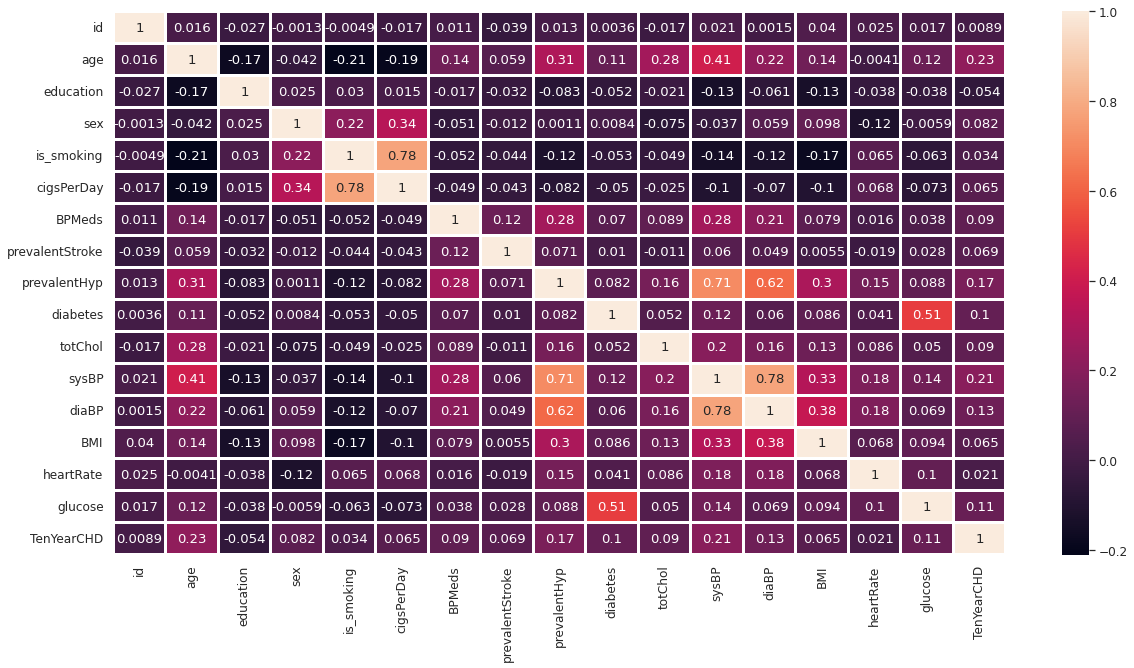

In [304]:
# Multicolinearity

plt.figure(figsize = (20, 10))
df_co_relation = df.corr()
sns.set(font_scale = 1.1)
sns.heatmap(df_co_relation, annot = True, linewidths = 2)
plt.show()

In [305]:
# Creating instances for Independent and Dependent variables
independent_variables = df.columns.tolist()
independent_variables.remove('id')
independent_variables.remove('TenYearCHD')

dependent_variable = ['TenYearCHD']
print('Independent variables : ',independent_variables)
print('Dependent variables   : ',dependent_variable)

Independent variables :  ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Dependent variables   :  ['TenYearCHD']


In [306]:
# Train test split
X = df[independent_variables].values
y = df[dependent_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print('X_train :',X_train.shape)
print('X_test  :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test  :',y_test.shape)

X_train : (2523, 15)
X_test  : (842, 15)
y_train : (2523, 1)
y_test  : (842, 1)


In [307]:
# Transforming data

# Normailzation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [308]:
# Logistic Regression
# Creating an instance of Logistic Regression
logistic = LogisticRegression(fit_intercept = True)

# Hyperparameters
grid = {'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}

# KFold
cv = KFold(n_splits = 5, random_state = None, shuffle = False)

# Grid Search
clf = GridSearchCV(logistic,grid,cv = cv,n_jobs = -1,scoring = 'f1_macro')

# Model fit
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [309]:
# Get the predicted probabilities
train_proba_preds = clf.predict_proba(X_train)[:,1]
test_proba_preds = clf.predict_proba(X_test)[:,1]

In [310]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [311]:
# Get the accuracy scores
train_accuracy = (accuracy_score(y_train,train_class_preds))*100
test_accuracy = (accuracy_score(y_test,test_class_preds))*100

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is  :", test_accuracy)

The accuracy on train data is : 85.73127229488703
The accuracy on test data is  : 85.03562945368171


In [312]:
# Here the accuracy score may be good. But for the imbalanced dataset ROC AUC score would be the appropriate metric

The ROC AUC score on train data is          : 0.72941
The ROC AUC score on test data is           : 0.73401
The Precision Recall score on train data is : 0.33345
The Precision Recall score on test data is  : 0.39415


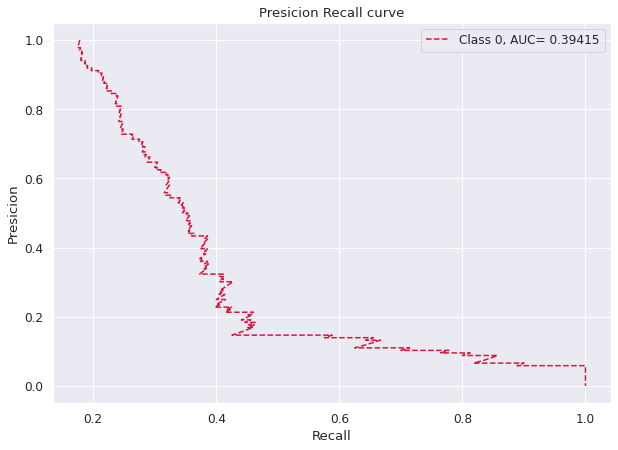

In [313]:
# Evaluation
# Get the 'ROC AUC' and 'Precision Recall' scores

# ROC AUC
train_roc_auc_score = roc_auc_score(y_train,train_proba_preds)
test_roc_auc_score = roc_auc_score(y_test,test_proba_preds)

print("The ROC AUC score on train data is          :", round(train_roc_auc_score,5))
print("The ROC AUC score on test data is           :", round(test_roc_auc_score,5))

# Precision Recall curve

precision_train, recall_train,_train = precision_recall_curve(y_train,train_proba_preds)
precision, recall,_ = precision_recall_curve(y_test,test_proba_preds)
  
# print(_)
auc_score_train = auc(recall_train, precision_train)
auc_score = auc(recall, precision)
print("The Precision Recall score on train data is :", round(auc_score_train,5))
print("The Precision Recall score on test data is  :", round(auc_score,5))

# Presicion Recall curve

# plotting    
plt.figure(figsize=(10,7))
plt.plot(precision, recall, linestyle='--',color='crimson',label = ((f'Class 1, AUC= {round(auc_score,5)}')))
plt.title('Presicion Recall curve')
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.legend(loc='best')

Train Confusion Matrix :
[[2141    9]
 [ 351   22]]
Test Confusion Matrix :
[[704   2]
 [124  12]]


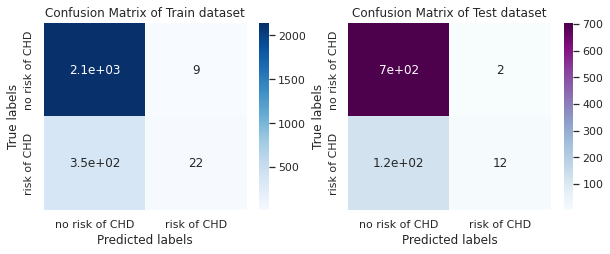

In [314]:
# Confusion matrix for train and test datasets.

plt.figure(figsize = (10,20))
sns.set_theme()
var_lsts= [y_train,train_class_preds,y_test, test_class_preds]

for var in enumerate(var_lsts):
  if var[0] == 0:
    ax  = plt.subplot(5,2,1)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Train Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,ax = ax,cmap="Blues") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Train dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)
  elif var[0] == 2:
    ax = plt.subplot(5,2,2)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Test Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,cmap="BuPu") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Test dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)

In [315]:
# Observations from Confusion Matrix of test dataset
# True Negative(TN) = Persons who dont have a risk of 10-year CHD, and our model predicted that they dont have a risk of 10-year CHD.
# True Positive(TP) = Persons who have a risk of 10-year CHD, and our model predicted that they have a risk of 10-year CHD.
# False Negative(FN) = Persons who have a risk of 10-year CHD, and our model predicted that they dont have a risk of 10-year CHD.
# False Positive(FP) = Persons who dont have a risk of 10-year CHD, and our model predicted that they have a risk of 10-year CHD.
print('True Negative  :',cm[0][0])
print('False Positive :',cm[0][1])
print('False Negative :',cm[1][0])
print('True Positive  :',cm[1][1])
# Precision - shows how correct the model is, when it predicts that a person has a risk of 10-year CHD.
Precision = (cm[1][1]/(cm[1][1]+cm[0][1])) *100
print('Precision      :',round(Precision,1),'%')
# 
# Recall - for all presons who have a risk of 10-year CHD, how many the model have correctly predicted as having a risk of 10-year CHD.
Recall = (cm[1][1]/(cm[1][1]+cm[1][0])) *100
print('Recall         :',round(Recall,1),'%')

True Negative  : 704
False Positive : 2
False Negative : 124
True Positive  : 12
Precision      : 85.7 %
Recall         : 8.8 %


In [316]:
# ROC Curve would be meaningless for Imbalanced dataset
# ROC Curve --> True_positive_rate vs False_positive_rate
# True_positive_rate = True_positive/(True_positive + False_negative)
# False_positive_rate = False_positive/(False_positive + True_negative)
# For an Imbalanced dataset True_negative would be always high, if the majority class is 0. So we always get less False_positive_rate.
# Presicion Recall curves would be appropriate for Imbalanced dataset.

In [317]:
# In the given case 
# A person with a risk of 10-year CHD cannot be classified as 'No risk of 10-year CHD'
# In our test dataset, cm[1][0] have a risk of 10-year CHD but our model predicted only cm[1][1] have a risk of 10-year CHD which is only 8%.
# Applying Logistic Regression on original dataset, the desired Recall is not acheived.

In [318]:
# Dataset, 'data' is used for DesicionTree models

In [319]:
data.shape

(3390, 17)

In [320]:
# Replacing 'M' with 1 and 'F' with 0 in 'sex' variable

data['sex'] = data['sex'].apply(lambda x: 1 if x == 'M' else 0)

# Replacing 'YES' with 1 and 'NO' with 0 in 'is_smoking' variable

data['is_smoking'] = data['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

In [321]:
# Treating NULL values
# 'education'
data['education'].fillna(0,inplace = True)
data.groupby('education').agg({'age':'mean'})
# print(data.groupby('education').agg({'age':'mean'}))
# From this we can replace education '0' with '1' because based on the average the education varies.
data['education'] = data['education'].apply(lambda x : 1 if x == 0 else x)

# 'cigsPerDay'
data[data['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'})
# print(data[data['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'}))
# As the average number of cigarettes consumed by Females is 14 and Males is 22
data.loc[ (data.sex == 0) & (data['cigsPerDay'].isna()), 'cigsPerDay'] =  14
data.loc[ (data.sex == 1) & (data['cigsPerDay'].isna()), 'cigsPerDay'] =  22

# 'totChol'
data['totChol'].fillna(int(data['totChol'].mean()), inplace = True)

# 'BMI'
data['BMI'].fillna(int(data['BMI'].mean()), inplace = True)

# 'Heart rate'
data['heartRate'].fillna(int(data['heartRate'].mean()), inplace = True)


# 'glucose'
data.groupby('diabetes').agg({'glucose':'mean'})
# print(data.groupby('diabetes').agg({'glucose':'mean'}))
# Average Glucose level of Patients without Diabetes is 79 and with Diabetes is 172
data.loc[ (data.diabetes == 0) & (data['glucose'].isna()), 'glucose'] =  79
data.loc[ (data.diabetes == 1) & (data['glucose'].isna()), 'glucose'] =  172

# 'BPMeds'
data.loc[(data.prevalentHyp == 1) & (data['BPMeds'].isna()), 'BPMeds'] =  1

In [322]:
# Droping the rows with 'BPMeds' as Nan value
data = data.dropna()
data.shape

(3365, 17)

In [323]:
# Creating instances for Independent and Dependent variables
independent_variables = df.columns.tolist()
independent_variables.remove('id')
independent_variables.remove('TenYearCHD')

dependent_variable = ['TenYearCHD']
print('Independent variables : ',independent_variables)
print('Dependent variables   : ',dependent_variable)

Independent variables :  ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Dependent variables   :  ['TenYearCHD']


In [324]:
# Train test split
X = data[independent_variables].values
y = data[dependent_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# print('X_train :',X_train.shape)
# print('X_test  :',X_test.shape)
# print('y_train :',y_train.shape)
# print('y_test  :',y_test.shape)

In [325]:
# Transforming data

# Normailzation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [326]:
# DesicionTreeclassifier

dt_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)

In [327]:
# Get the predicted probabilities
train_proba_preds = dt_classifier.predict_proba(X_train)[:,1]
test_proba_preds = dt_classifier.predict_proba(X_test)[:,1]

In [328]:
# Get the Predicted classes
y_train_dt_predict = dt_classifier.predict(X_train)
y_test_dt_predict= dt_classifier.predict(X_test)

In [329]:
# Get the accuracy scores
train_accuracy = (accuracy_score(y_train,y_train_dt_predict))*100
test_accuracy = (accuracy_score(y_test,y_test_dt_predict))*100

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is  :", test_accuracy)

The accuracy on train data is : 85.6520015854142
The accuracy on test data is  : 83.9667458432304


The ROC AUC score on train data is          : 0.68958
The ROC AUC score on test data is           : 0.64832
The Precision Recall score on train data is : 0.35236
The Precision Recall score on test data is  : 0.28791


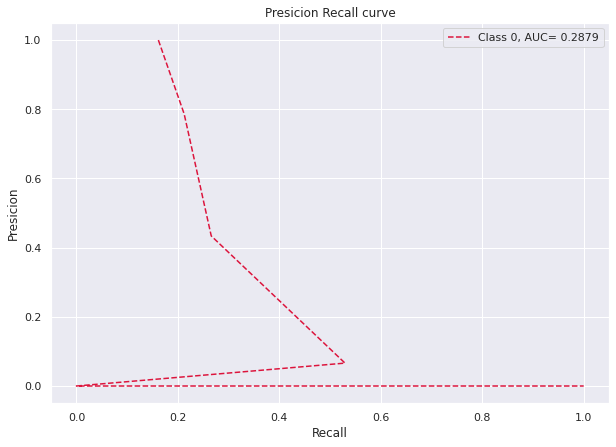

In [330]:
# Evaluation
# Get the 'ROC AUC' and 'Precision Recall' scores

# ROC AUC
train_roc_auc_score = roc_auc_score(y_train,train_proba_preds)
test_roc_auc_score = roc_auc_score(y_test,test_proba_preds)

print("The ROC AUC score on train data is          :", round(train_roc_auc_score,5))
print("The ROC AUC score on test data is           :", round(test_roc_auc_score,5))

# Precision Recall curve

precision_train, recall_train,_train = precision_recall_curve(y_train,train_proba_preds)
precision, recall,_ = precision_recall_curve(y_test,test_proba_preds)
  
# print(_)
auc_score_train = auc(recall_train, precision_train)
auc_score = auc(recall, precision)
print("The Precision Recall score on train data is :", round(auc_score_train,5))
print("The Precision Recall score on test data is  :", round(auc_score,5))

# Presicion Recall curve

# plotting    
plt.figure(figsize=(10,7))
plt.plot(precision, recall, linestyle='--',color='crimson',label = ((f'Class 1, AUC= {round(auc_score,4)}')))
plt.title('Presicion Recall curve')
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.legend(loc='best')

Train Confusion Matrix :
[[2138   12]
 [ 350   23]]
Test Confusion Matrix :
[[698   8]
 [127   9]]


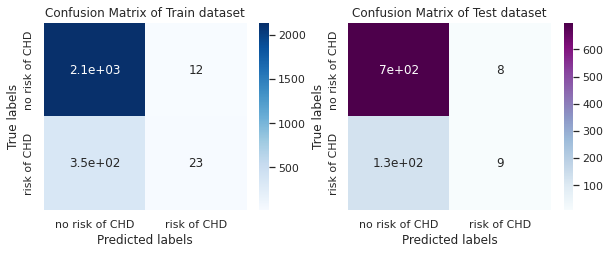

In [331]:
# Confusion matrix for train and test datasets.

plt.figure(figsize = (10,20))
sns.set_theme()
var_lsts= [y_train,y_train_dt_predict,y_test, y_test_dt_predict]

for var in enumerate(var_lsts):
  if var[0] == 0:
    ax  = plt.subplot(5,2,1)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Train Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,ax = ax,cmap="Blues") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Train dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)
  elif var[0] == 2:
    ax = plt.subplot(5,2,2)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Test Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,cmap="BuPu") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Test dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)

In [332]:
# Observations from Confusion Matrix of test dataset
# True Negative(TN) = Persons who dont have a risk of 10-year CHD, and our model predicted that they dont have a risk of 10-year CHD.
# True Positive(TP) = Persons who have a risk of 10-year CHD, and our model predicted that they have a risk of 10-year CHD.
# False Negative(FN) = Persons who have a risk of 10-year CHD, and our model predicted that they dont have a risk of 10-year CHD.
# False Positive(FP) = Persons who dont have a risk of 10-year CHD, and our model predicted that they have a risk of 10-year CHD.
print('True Negative  :',cm[0][0])
print('False Positive :',cm[0][1])
print('False Negative :',cm[1][0])
print('True Positive  :',cm[1][1])
# Precision - shows how correct the model is, when it predicts that a person has a risk of 10-year CHD.
Precision = (cm[1][1]/(cm[1][1]+cm[0][1])) *100
print('Precision      :',round(Precision,1),'%')
# 
# Recall - for all presons who have a risk of 10-year CHD, how many the model have correctly predicted as having a risk of 10-year CHD.
Recall = (cm[1][1]/(cm[1][1]+cm[1][0])) *100
print('Recall         :',round(Recall,1),'%')

True Negative  : 698
False Positive : 8
False Negative : 127
True Positive  : 9
Precision      : 52.9 %
Recall         : 6.6 %


In [333]:
# Ensemble techniques of Desicion Tree

In [334]:
# RandomForestClassifer

# Number of trees
# n_estimators = [100,150,170]
n_estimators = [100]

# Maximum depth of trees
# max_depth = [5,15,20]
max_depth = [15]

# Minimum number of samples required to split a node
# min_samples_split = [50,80,100]
min_samples_split = [80]

# Minimum number of samples required at each leaf node
# min_samples_leaf = [20,40,60]
min_samples_leaf = [20]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

# class_weight = dict({0:1,1:2})

In [335]:
# Create an instance of the RandomForestClassifier
rfc_model = RandomForestClassifier(random_state = 0)

# Grid search
rfc_grid = GridSearchCV(estimator=rfc_model,param_grid = param_dict,cv = 5, verbose=2, scoring='roc_auc')

rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=15, min_samples_leaf=20, min_samples_split=80, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=20, min_samples_split=80, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=20, min_samples_split=80, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=20, min_samples_split=80, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=20, min_samples_split=80, n_estimators=100; total time=   0.2s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [15], 'min_samples_leaf': [20],
                         'min_samples_split': [80], 'n_estimators': [100]},
             scoring='roc_auc', verbose=2)

In [336]:
rfc_optimal_model = rfc_grid.best_estimator_

In [337]:
# Best Parameters
rfc_grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 20,
 'min_samples_split': 80,
 'n_estimators': 100}

In [338]:
# Get the predicted probabilities
train_proba_preds = rfc_optimal_model.predict_proba(X_train)[:,1]
test_proba_preds = rfc_optimal_model.predict_proba(X_test)[:,1]

In [339]:
# Get the Predicted classes

y_train_predict_rfc_cv = rfc_optimal_model.predict(X_train)
y_test_predict_rfc_cv = rfc_optimal_model.predict(X_test)

In [340]:
# Get the accuracy scores
train_accuracy = (accuracy_score(y_train,y_train_predict_rfc_cv))*100
test_accuracy = (accuracy_score(y_test,y_test_predict_rfc_cv))*100

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is  :", test_accuracy)

The accuracy on train data is : 85.21601268331351
The accuracy on test data is  : 83.8479809976247


The ROC AUC score on train data is          : 0.80987
The ROC AUC score on test data is           : 0.70574
The Precision Recall score on train data is : 0.43966
The Precision Recall score on test data is  : 0.32739


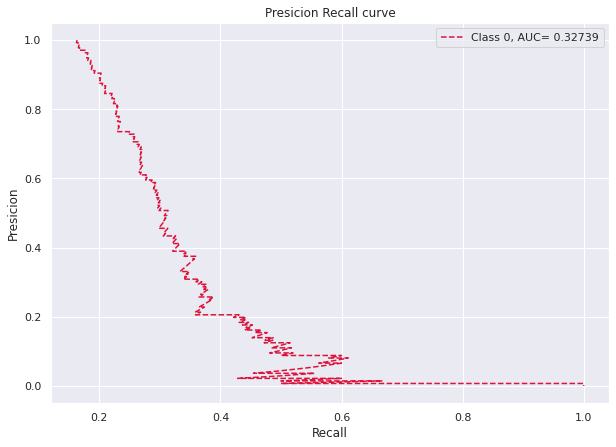

In [341]:
# Evaluation
# Get the 'ROC AUC' and 'Precision Recall' scores

# ROC AUC
train_roc_auc_score = roc_auc_score(y_train,train_proba_preds)
test_roc_auc_score = roc_auc_score(y_test,test_proba_preds)

print("The ROC AUC score on train data is          :", round(train_roc_auc_score,5))
print("The ROC AUC score on test data is           :", round(test_roc_auc_score,5))

# Precision Recall curve

precision_train, recall_train,_train = precision_recall_curve(y_train,train_proba_preds)
precision, recall,_ = precision_recall_curve(y_test,test_proba_preds)
  
# print(_)
auc_score_train = auc(recall_train, precision_train)
auc_score = auc(recall, precision)
print("The Precision Recall score on train data is :", round(auc_score_train,5))
print("The Precision Recall score on test data is  :", round(auc_score,5))

# Presicion Recall curve

# plotting    
plt.figure(figsize=(10,7))
plt.plot(precision, recall, linestyle='--',color='crimson',label = ((f'Class 1, AUC= {round(auc_score,5)}')))
plt.title('Presicion Recall curve')
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.legend(loc='best')

Train Confusion Matrix :
[[2150    0]
 [ 373    0]]
Test Confusion Matrix :
[[706   0]
 [136   0]]


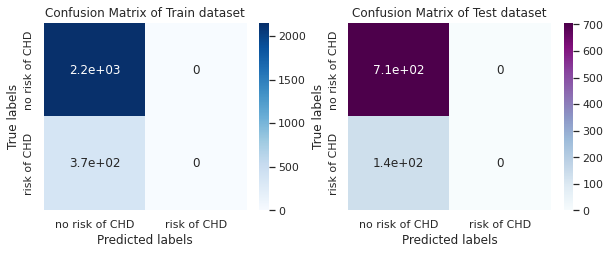

In [342]:
# Confusion matrix for train and test datasets.

plt.figure(figsize = (10,20))
sns.set_theme()
var_lsts= [y_train,y_train_predict_rfc_cv,y_test, y_test_predict_rfc_cv]

for var in enumerate(var_lsts):
  if var[0] == 0:
    ax  = plt.subplot(5,2,1)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Train Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,ax = ax,cmap="Blues") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Train dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)
  elif var[0] == 2:
    ax = plt.subplot(5,2,2)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Test Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,cmap="BuPu") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Test dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)

In [343]:
# Class Imbalance is the problem of classification when there is an unequal distribution of classes in the dataset

In [344]:
# Class Imbalnce
NO_risk_of_CHD,risk_of_CHD = df['TenYearCHD'].value_counts()
total_observations = NO_risk_of_CHD + risk_of_CHD
no_risk_precent = round((NO_risk_of_CHD/(NO_risk_of_CHD + risk_of_CHD)) *100,2)
risk_precent = round((risk_of_CHD/(NO_risk_of_CHD + risk_of_CHD)) *100,2)
print('No Risk of 10-Year CHD: ',no_risk_precent,'%')
print('Risk of 10-Year CHD: ',risk_precent,'%')

No Risk of 10-Year CHD:  84.87 %
Risk of 10-Year CHD:  15.13 %


In [345]:
# Only 15% percent of the Pateints are having a Risk of 10-year CHD.

In [346]:
# Desired ROC AUC scores are not acheived by appling original dataset in the models.

In [419]:
# Random Under Sampling

# Creating an instance of Random Under Sampler
rus = RandomUnderSampler(random_state = 234)

X_rus,y_rus = rus.fit_resample(data.iloc[:,0:-1], data['TenYearCHD'])
# print(X_rus.shape)
# print(y_rus.shape)

rus_x = pd.DataFrame(X_rus)
rus_y = pd.DataFrame(y_rus)
rus_xy = pd.concat([rus_x,rus_y], axis = 1)
# rus_xy

# Equal number of classes after Under sampling
rus_xy['TenYearCHD'].value_counts()

0    509
1    509
Name: TenYearCHD, dtype: int64

In [420]:
# Synthetic Minority Oversampling Technique

# Creating an instance of Random Under Sampler
smote = SMOTE(sampling_strategy=1,random_state = 0,k_neighbors=5)

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['TenYearCHD'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

xy_smote = pd.concat([X_smote,y_smote],axis = 1)
# xy_smote.head()

# Equal number of classes after Under sampling
xy_smote['TenYearCHD'].value_counts()

Original dataset shape 3365
Resampled dataset shape 5712


1    2856
0    2856
Name: TenYearCHD, dtype: int64

In [421]:
# SMOTETomek

# Creating an instance of Random Under Sampler
smotetomek = SMOTETomek(sampling_strategy='auto',random_state = 0)

# fit predictor and target variable
X_smotetomek, y_smotetomek = smotetomek.fit_resample(data.iloc[:,0:-1], data['TenYearCHD'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

xy_smotetomek = pd.concat([X_smotetomek,y_smotetomek],axis = 1)
# xy_smotetomek.head()

# Equal number of classes after Under sampling
xy_smotetomek['TenYearCHD'].value_counts()

Original dataset shape 3365
Resampled dataset shape 5712


1    2816
0    2816
Name: TenYearCHD, dtype: int64

In [347]:
# Random under sampling had been tried with all the below models, but it leads to the huge information loss and ROC AUC score is not improved.
# SMOTE, SMOTETomek had been tried with all the below models, but Random Over Sampling was found to be more effective.
# Random Over Sampling is found to be one of the effective technique to handle imbalanced data.

In [348]:
# Random Over Sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy= 1.0,random_state = 0)
X_ros,y_ros = ros.fit_resample(data.iloc[:,0:-1], data['TenYearCHD'])
print('X ros :',X_ros.shape)
print('y ros :',y_ros.shape)

X ros : (5712, 16)
y ros : (5712,)


In [349]:
# Concating two data frames
ros_x = pd.DataFrame(X_ros)
ros_y = pd.DataFrame(y_ros)
ros_xy = pd.concat([ros_x,ros_y], axis = 1)
# ros_xy.head()

In [350]:
# Classes after sampling
ros_xy['TenYearCHD'].value_counts()

1    2856
0    2856
Name: TenYearCHD, dtype: int64

In [351]:
# Creating instances for Independent and Dependent variables
independent_variables = data.columns.tolist()
independent_variables.remove('id')
independent_variables.remove('TenYearCHD')

dependent_variable = ['TenYearCHD']
print('Independent variables : ',independent_variables)
print('Dependent variables   : ',dependent_variable)

Independent variables :  ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Dependent variables   :  ['TenYearCHD']


In [352]:
# Train test split

X_ros = ros_xy[independent_variables].values
y_ros = ros_xy[dependent_variable].values


X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size = 0.33,random_state = 0)

In [353]:
# Logistic Regression on Random Over sampled data

# Create an instance of the LogisticRegression
log_reg = LogisticRegression()

# Hyperparmeters
grid = {'C': 10.0**np.arange(-5,1),'penalty':['l1','l2']}
cv = KFold(n_splits = 6,random_state = None,shuffle = False)

# Grid Search
log_classifier = GridSearchCV(log_reg,grid,cv=cv,n_jobs = -1,scoring = 'f1_macro')

# Model Fit
log_classifier.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [354]:
# Get the predicted probabilities
train_proba_preds = log_classifier.predict_proba(X_train)[:,1]
test_proba_preds = log_classifier.predict_proba(X_test)[:,1]

In [355]:
# Get the Predicted classes
y_train_log_predict = log_classifier.predict(X_train)
y_test_log_predict = log_classifier.predict(X_test)

In [356]:
# Get the accuracy scores
train_accuracy = (accuracy_score(y_train,y_train_log_predict))*100
test_accuracy = (accuracy_score(y_test,y_test_log_predict))*100

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is  :", test_accuracy)

The accuracy on train data is : 65.69114188659523
The accuracy on test data is  : 64.72148541114059


The ROC AUC score on train data is          : 0.71434
The ROC AUC score on test data is           : 0.69948
The Precision Recall score on train data is : 0.70048
The Precision Recall score on test data is  : 0.68614
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       935
           1       0.66      0.63      0.64       950

    accuracy                           0.65      1885
   macro avg       0.65      0.65      0.65      1885
weighted avg       0.65      0.65      0.65      1885



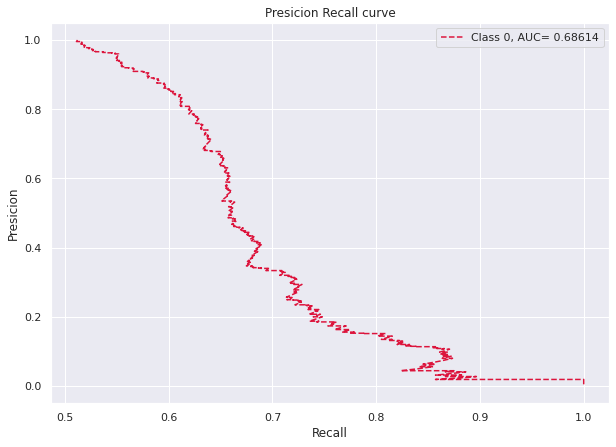

In [357]:
# Evaluation
# Get the 'ROC AUC' and 'Precision Recall' scores

# ROC AUC
train_roc_auc_score = roc_auc_score(y_train,train_proba_preds)
test_roc_auc_score = roc_auc_score(y_test,test_proba_preds)

print("The ROC AUC score on train data is          :", round(train_roc_auc_score,5))
print("The ROC AUC score on test data is           :", round(test_roc_auc_score,5))

# Precision Recall curve

precision_train, recall_train,_train = precision_recall_curve(y_train,train_proba_preds)
precision, recall,_ = precision_recall_curve(y_test,test_proba_preds)
  
# print(_)
auc_score_train = auc(recall_train, precision_train)
auc_score = auc(recall, precision)
print("The Precision Recall score on train data is :", round(auc_score_train,5))
print("The Precision Recall score on test data is  :", round(auc_score,5))

# Classification Report
print(classification_report(y_test,y_test_log_predict))

# Presicion Recall curve

# plotting    
plt.figure(figsize=(10,7))
plt.plot(precision, recall, linestyle='--',color='crimson',label = ((f'Class 1, AUC= {round(auc_score,5)}')))
plt.title('Presicion Recall curve')
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.legend(loc='best')

Train Confusion Matrix :
[[1319  602]
 [ 711 1195]]
Test Confusion Matrix :
[[621 314]
 [351 599]]


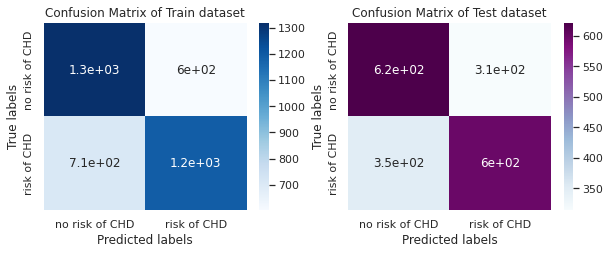

In [358]:
# Confusion matrix for train and test datasets.

plt.figure(figsize = (10,20))
sns.set_theme()
var_lsts= [y_train,y_train_log_predict,y_test, y_test_log_predict]

for var in enumerate(var_lsts):
  if var[0] == 0:
    ax  = plt.subplot(5,2,1)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Train Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,ax = ax,cmap="Blues") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Train dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)
  elif var[0] == 2:
    ax = plt.subplot(5,2,2)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Test Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,cmap="BuPu") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Test dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)

In [359]:
# Ensembles of Desicion Tree

In [360]:
# Ensembling techniques
# Random Forest Classifer on Random Over sampled data

# Number of trees
# n_estimators = [50,100,150]
n_estimators = [100]

# Maximum depth of trees
# max_depth = [10,20,40]
max_depth = [22]

# Minimum number of samples required to split a node
# min_samples_split = [4,6,8]
min_samples_split = [4]

# Minimum number of samples required at each leaf node
# min_samples_leaf = [3,5,7]
min_samples_leaf = [3]

# Hyperparameters Grid
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [361]:
# Create an instance of the RandomForestClassifier
rfc_model = RandomForestClassifier(criterion = 'gini',class_weight = {0:1,1:1.5},random_state = 0)

# By adding weights to Class 1, False Negative can be reduced

# Grid search
rfc_grid = GridSearchCV(estimator=rfc_model,param_grid = param_dict,cv = 5, verbose=2, scoring='f1_macro')

# Model Fit
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.4s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 1.5},
                                              random_state=0),
             param_grid={'max_depth': [22], 'min_samples_leaf': [3],
                         'min_samples_split': [4], 'n_estimators': [100]},
             scoring='f1_macro', verbose=2)

In [362]:
rfc_optimal_model = rfc_grid.best_estimator_
print(rfc_grid.best_params_)

{'max_depth': 22, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}


In [363]:
# Get predicted probability
train_proba_preds = rfc_optimal_model.predict_proba(X_train)[:,1]
test_proba_preds = rfc_optimal_model.predict_proba(X_test)[:,1]

In [364]:
# Get predicted classes
y_train_predict_rfc_cv = rfc_optimal_model.predict(X_train)
y_test_predict_rfc_cv = rfc_optimal_model.predict(X_test)

In [365]:
# Get the accuracy scores
train_accuracy = (accuracy_score(y_train,y_train_predict_rfc_cv))*100
test_accuracy = (accuracy_score(y_test,y_test_predict_rfc_cv))*100

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is  :", test_accuracy)

The accuracy on train data is : 99.05931539064542
The accuracy on test data is  : 89.33687002652519


The ROC AUC score on train data is          : 0.99948
The ROC AUC score on test data is           : 0.97413
The Precision Recall score on train data is : 0.99952
The Precision Recall score on test data is  : 0.97841
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       935
           1       0.86      0.93      0.90       950

    accuracy                           0.89      1885
   macro avg       0.90      0.89      0.89      1885
weighted avg       0.90      0.89      0.89      1885



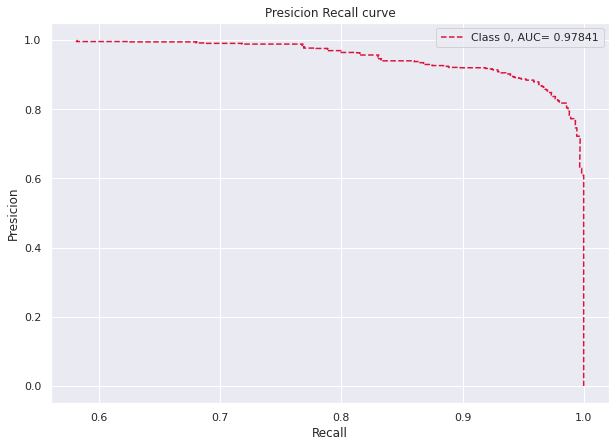

In [366]:
# Evaluation
# Get the 'ROC AUC' and 'Precision Recall' scores

# ROC AUC
train_roc_auc_score = roc_auc_score(y_train,train_proba_preds)
test_roc_auc_score = roc_auc_score(y_test,test_proba_preds)

print("The ROC AUC score on train data is          :", round(train_roc_auc_score,5))
print("The ROC AUC score on test data is           :", round(test_roc_auc_score,5))

# Precision Recall curve

precision_train, recall_train,_train = precision_recall_curve(y_train,train_proba_preds)
precision, recall,_ = precision_recall_curve(y_test,test_proba_preds)
  
# print(_)
auc_score_train = auc(recall_train, precision_train)
auc_score = auc(recall, precision)
print("The Precision Recall score on train data is :", round(auc_score_train,5))
print("The Precision Recall score on test data is  :", round(auc_score,5))

# Classification Report
print(classification_report(y_test,y_test_predict_rfc_cv))

# Presicion Recall curve

# plotting    
plt.figure(figsize=(10,7))
plt.plot(precision, recall, linestyle='--',color='crimson',label = ((f'Class 1, AUC= {round(auc_score,5)}')))
plt.title('Presicion Recall curve')
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.legend(loc='best')

Train Confusion Matrix :
[[1900   21]
 [  15 1891]]
Test Confusion Matrix :
[[796 139]
 [ 62 888]]


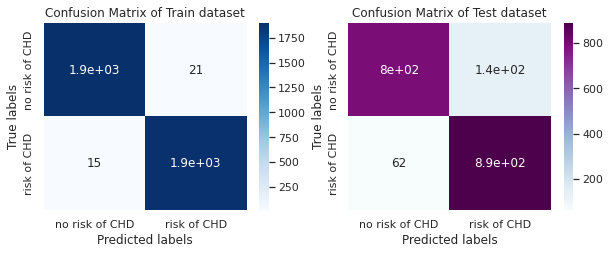

In [367]:
# Confusion matrix for train and test datasets.

plt.figure(figsize = (10,20))
sns.set_theme()
var_lsts= [y_train,y_train_predict_rfc_cv,y_test, y_test_predict_rfc_cv]

for var in enumerate(var_lsts):
  if var[0] == 0:
    ax  = plt.subplot(5,2,1)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Train Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,ax = ax,cmap="Blues") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Train dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)
  elif var[0] == 2:
    ax = plt.subplot(5,2,2)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Test Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,cmap="BuPu") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Test dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)

In [368]:
# Gradient Boosting Classifier on Random Over Sampled data

In [369]:
# Number of trees
n_estimators = [200]
# n_estimators = [150,200,250]

# Maximum depth of trees
max_depth = [50]
# max_depth = [40,50,60]

# Minimum number of samples required to split a node
min_samples_split = [60]
# min_samples_split = [50,60,70]

# Minimum number of samples required at each leaf node
min_samples_leaf = [70]
# min_samples_leaf = [60,70,80]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}


In [370]:
# Create an instance of the RandomForestClassifier
gbc_model = GradientBoostingClassifier(random_state = 0)

# Grid search
gbc_grid = GridSearchCV(estimator=gbc_model,param_grid = param_dict,cv = 5, verbose=2, scoring='roc_auc')

# Model Fit
gbc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=50, min_samples_leaf=70, min_samples_split=60, n_estimators=200; total time=   2.8s
[CV] END max_depth=50, min_samples_leaf=70, min_samples_split=60, n_estimators=200; total time=   2.8s
[CV] END max_depth=50, min_samples_leaf=70, min_samples_split=60, n_estimators=200; total time=   2.8s
[CV] END max_depth=50, min_samples_leaf=70, min_samples_split=60, n_estimators=200; total time=   2.8s
[CV] END max_depth=50, min_samples_leaf=70, min_samples_split=60, n_estimators=200; total time=   2.9s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [50], 'min_samples_leaf': [70],
                         'min_samples_split': [60], 'n_estimators': [200]},
             scoring='roc_auc', verbose=2)

In [371]:
gbc_optimal_model = gbc_grid.best_estimator_

print(gbc_grid.best_params_)

{'max_depth': 50, 'min_samples_leaf': 70, 'min_samples_split': 60, 'n_estimators': 200}


In [372]:
# Get predicted probability
train_proba_preds = gbc_optimal_model.predict_proba(X_train)[:,1]
test_proba_preds = gbc_optimal_model.predict_proba(X_test)[:,1]

In [373]:
# Get the predicted classes

y_train_predict_gbc_cv = gbc_optimal_model.predict(X_train)
y_test_predict_gbc_cv = gbc_optimal_model.predict(X_test)

In [374]:
# Get the accuracy scores
train_accuracy = (accuracy_score(y_train,y_train_predict_gbc_cv))*100
test_accuracy = (accuracy_score(y_test,y_test_predict_gbc_cv))*100

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is  :", test_accuracy)

The accuracy on train data is : 99.8170891037366
The accuracy on test data is  : 93.15649867374005


The ROC AUC score on train data is          : 0.99998
The ROC AUC score on test data is           : 0.97932
The Precision Recall score on train data is : 0.99998
The Precision Recall score on test data is  : 0.97744
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       935
           1       0.90      0.97      0.93       950

    accuracy                           0.93      1885
   macro avg       0.94      0.93      0.93      1885
weighted avg       0.93      0.93      0.93      1885



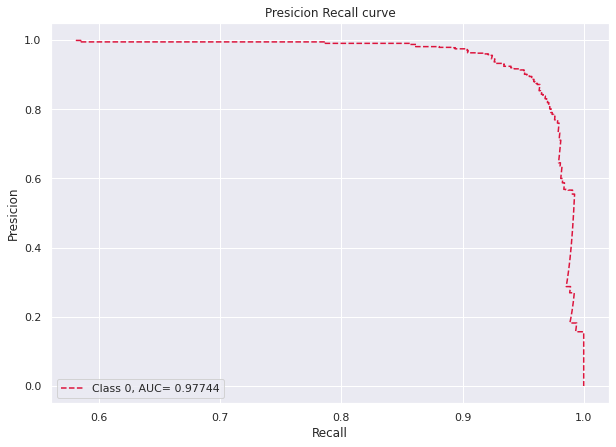

In [375]:
# Evaluation
# Get the 'ROC AUC' and 'Precision Recall' scores

# ROC AUC
train_roc_auc_score = roc_auc_score(y_train,train_proba_preds)
test_roc_auc_score = roc_auc_score(y_test,test_proba_preds)

print("The ROC AUC score on train data is          :", round(train_roc_auc_score,5))
print("The ROC AUC score on test data is           :", round(test_roc_auc_score,5))

# Precision Recall curve

precision_train, recall_train,_train = precision_recall_curve(y_train,train_proba_preds)
precision, recall,_ = precision_recall_curve(y_test,test_proba_preds)
  
# print(_)
auc_score_train = auc(recall_train, precision_train)
auc_score = auc(recall, precision)
print("The Precision Recall score on train data is :", round(auc_score_train,5))
print("The Precision Recall score on test data is  :", round(auc_score,5))

# Classification Report
print(classification_report(y_test,y_test_predict_gbc_cv))

# Presicion Recall curve

# plotting    
plt.figure(figsize=(10,7))
plt.plot(precision, recall, linestyle='--',color='crimson',label = ((f'Class 1, AUC= {round(auc_score,5)}')))
plt.title('Presicion Recall curve')
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.legend(loc='best')

Train Confusion Matrix :
[[1917    4]
 [   3 1903]]
Test Confusion Matrix :
[[830 105]
 [ 24 926]]


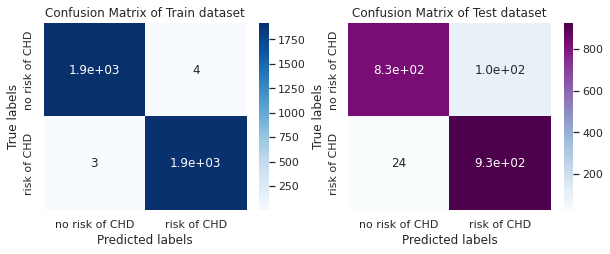

In [376]:
# Confusion matrix for train and test datasets.

plt.figure(figsize = (10,20))
sns.set_theme()
var_lsts= [y_train,y_train_predict_gbc_cv,y_test, y_test_predict_gbc_cv]

for var in enumerate(var_lsts):
  if var[0] == 0:
    ax  = plt.subplot(5,2,1)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Train Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,ax = ax,cmap="Blues") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Train dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)
  elif var[0] == 2:
    ax = plt.subplot(5,2,2)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Test Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,cmap="BuPu") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Test dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)

In [377]:
# XGB Classifier on Random Over Sampled data

In [378]:
# Number of trees
# n_estimators = [200]
n_estimators = [100]

# Maximum depth of trees
# max_depth = [3,6,8,10]
max_depth = [10]

# Learning_rate
# learning_rate = [0.01,0.1,0.2]
learning_rate = [0.2]

# Minimum child weight
# min_child_weight = [1,5,10]
min_child_weight = [1]

# subsample 
# subsample = [0.5,0.7,0.9]
subsample = [0.5]

#gamma
# gamma = [1,5,8] 
gamma = [1]

# lambda
reg_lambda = [1]

# scale pos weight
scale_pos_weight = [6]
# class 0 --> 2856
# class 1 --> 509
# 2856/509 = 6

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'learning_rate' : learning_rate,
              'min_child_weight' : min_child_weight,'subsample ' : subsample ,'gamma' : gamma,'reg_lambda' :reg_lambda }

In [379]:
# Create an instance of the RandomForestClassifier
xgb_model = XGBClassifier(random_state = 0,seed = 1)

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_dict,cv = 5, verbose=2, scoring='roc_auc')

# Model Fit
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gamma=1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample =0.5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample =0.5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample =0.5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample =0.5; total time=   0.6s
[CV] END gamma=1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample =0.5; total time=   0.6s


GridSearchCV(cv=5, estimator=XGBClassifier(seed=1),
             param_grid={'gamma': [1], 'learning_rate': [0.2],
                         'max_depth': [10], 'min_child_weight': [1],
                         'n_estimators': [100], 'reg_lambda': [1],
                         'subsample ': [0.5]},
             scoring='roc_auc', verbose=2)

In [380]:
xgb_optimal_model = xgb_grid.best_estimator_

print(xgb_grid.best_params_)

{'gamma': 1, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100, 'reg_lambda': 1, 'subsample ': 0.5}


In [381]:
# Get predicted probability
train_proba_preds = xgb_optimal_model.predict_proba(X_train)[:,1]
test_proba_preds = xgb_optimal_model.predict_proba(X_test)[:,1]

In [382]:
# Get the predicted classes
y_train_predict_xgb_cv = xgb_optimal_model.predict(X_train)
y_test_predict_xgb_cv = xgb_optimal_model.predict(X_test)

In [383]:
# Get the accuracy scores
train_accuracy = (accuracy_score(y_train,y_train_predict_xgb_cv))*100
test_accuracy = (accuracy_score(y_test,y_test_predict_xgb_cv))*100

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is  :", test_accuracy)

The accuracy on train data is : 99.79095897569898
The accuracy on test data is  : 91.56498673740053


The ROC AUC score on train data is          : 0.99995
The ROC AUC score on test data is           : 0.97255
The Precision Recall score on train data is : 0.99995
The Precision Recall score on test data is  : 0.97338
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       935
           1       0.89      0.95      0.92       950

    accuracy                           0.92      1885
   macro avg       0.92      0.92      0.92      1885
weighted avg       0.92      0.92      0.92      1885



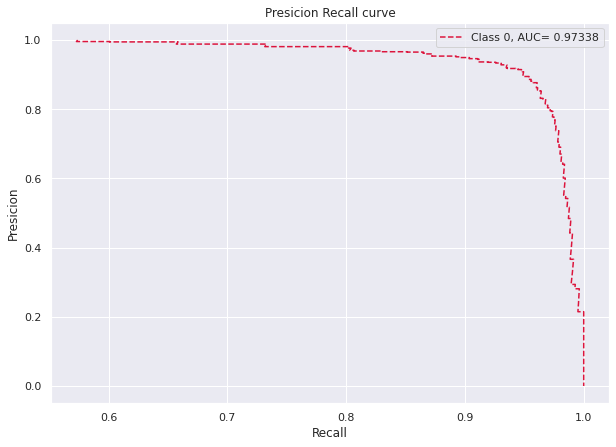

In [384]:
# Evaluation
# Get the 'ROC AUC' and 'Precision Recall' scores

# ROC AUC
train_roc_auc_score = roc_auc_score(y_train,train_proba_preds)
test_roc_auc_score = roc_auc_score(y_test,test_proba_preds)

print("The ROC AUC score on train data is          :", round(train_roc_auc_score,5))
print("The ROC AUC score on test data is           :", round(test_roc_auc_score,5))

# Precision Recall curve

precision_train, recall_train,_train = precision_recall_curve(y_train,train_proba_preds)
precision, recall,_ = precision_recall_curve(y_test,test_proba_preds)
  
# print(_)
auc_score_train = auc(recall_train, precision_train)
auc_score = auc(recall, precision)
print("The Precision Recall score on train data is :", round(auc_score_train,5))
print("The Precision Recall score on test data is  :", round(auc_score,5))

# Classification Report
print(classification_report(y_test,y_test_predict_xgb_cv))

# Presicion Recall curve

# plotting    
plt.figure(figsize=(10,7))
plt.plot(precision, recall, linestyle='--',color='crimson',label = ((f'Class 1, AUC= {round(auc_score,5)}')))
plt.title('Presicion Recall curve')
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.legend(loc='best')

Train Confusion Matrix :
[[1919    2]
 [   6 1900]]
Test Confusion Matrix :
[[820 115]
 [ 44 906]]


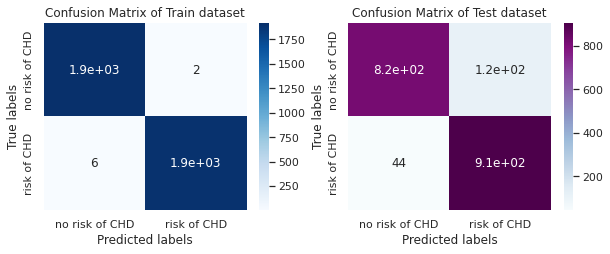

In [385]:
# Confusion matrix for train and test datasets.

plt.figure(figsize = (10,20))
sns.set_theme()
var_lsts= [y_train,y_train_predict_xgb_cv,y_test, y_test_predict_xgb_cv]

for var in enumerate(var_lsts):
  if var[0] == 0:
    ax  = plt.subplot(5,2,1)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Train Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,ax = ax,cmap="Blues") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Train dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)
  elif var[0] == 2:
    ax = plt.subplot(5,2,2)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Test Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,cmap="BuPu") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Test dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)

In [386]:
# KNeighbors Classifier on Random Over Sampled Data

In [387]:
# Identifing the range of K values

In [388]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

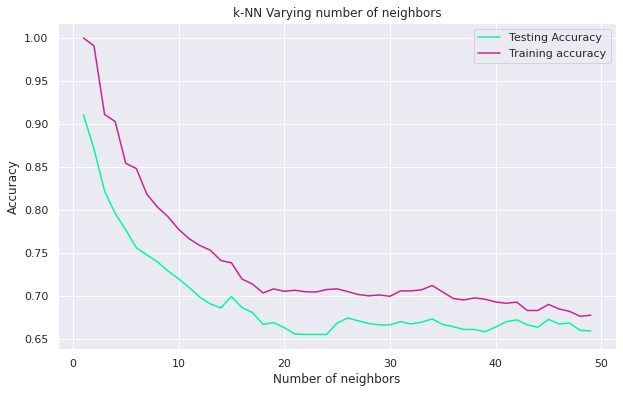

In [389]:
# Generate plot
plt.figure(figsize = (10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy',color = 'mediumspringgreen')
plt.plot(neighbors, train_accuracy, label='Training accuracy',color = '#D02090')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
# '#e7b2ff','#89ffcc'

In [390]:
# KNeighborsClassifier

# From the graph we could able to get the best range of K value is between 5 and 20,
# Hyperparameter grid
# para = {'n_neighbors' : np.arange(1,100)}
para = {'n_neighbors' : np.arange(5,20)}

In [391]:
# Creating an instance of the KNeighborsClassifier

knn = KNeighborsClassifier(weights='uniform',p=2)

# GridSearch
knn_cv = GridSearchCV(knn,param_grid = para,cv =5)

# Model Fit
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [392]:
knn_optimal_model = knn_cv.best_estimator_

print(knn_cv.best_params_)

{'n_neighbors': 5}


In [393]:
# Get predicted probability
train_proba_preds = knn_cv.predict_proba(X_train)[:,1]
test_proba_preds = knn_cv.predict_proba(X_test)[:,1]

In [394]:
# Get the predicted classes

y_train_predict_knn_cv = knn_cv.predict(X_train)
y_test_predict_knn_cv = knn_cv.predict(X_test)

In [395]:
# Get the accuracy scores
train_accuracy = (accuracy_score(y_train,y_train_predict_knn_cv))*100
test_accuracy = (accuracy_score(y_test,y_test_predict_knn_cv))*100

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is  :", test_accuracy)

The accuracy on train data is : 85.44551868304154
The accuracy on test data is  : 77.71883289124668


The ROC AUC score on train data is          : 0.95462
The ROC AUC score on test data is           : 0.85219
The Precision Recall score on train data is : 0.95932
The Precision Recall score on test data is  : 0.84561
              precision    recall  f1-score   support

           0       0.84      0.67      0.75       935
           1       0.73      0.88      0.80       950

    accuracy                           0.78      1885
   macro avg       0.79      0.78      0.77      1885
weighted avg       0.79      0.78      0.77      1885



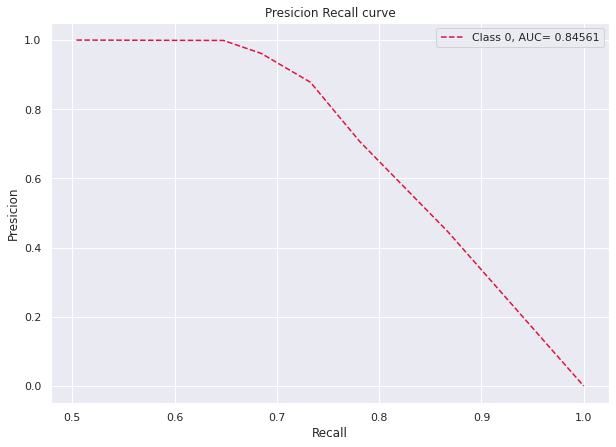

In [396]:
# Evaluation
# Get the 'ROC AUC' and 'Precision Recall' scores

# ROC AUC
train_roc_auc_score = roc_auc_score(y_train,train_proba_preds)
test_roc_auc_score = roc_auc_score(y_test,test_proba_preds)

print("The ROC AUC score on train data is          :", round(train_roc_auc_score,5))
print("The ROC AUC score on test data is           :", round(test_roc_auc_score,5))

# Precision Recall curve

precision_train, recall_train,_train = precision_recall_curve(y_train,train_proba_preds)
precision, recall,_ = precision_recall_curve(y_test,test_proba_preds)
  
# print(_)
auc_score_train = auc(recall_train, precision_train)
auc_score = auc(recall, precision)
print("The Precision Recall score on train data is :", round(auc_score_train,5))
print("The Precision Recall score on test data is  :", round(auc_score,5))

# Classification Report
print(classification_report(y_test,y_test_predict_knn_cv))

# Presicion Recall curve

# plotting    
plt.figure(figsize=(10,7))
plt.plot(precision, recall, linestyle='--',color='crimson',label = ((f'Class 1, AUC= {round(auc_score,5)}')))
plt.title('Presicion Recall curve')
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.legend(loc='best')

Train Confusion Matrix :
[[1442  479]
 [  78 1828]]
Test Confusion Matrix :
[[631 304]
 [116 834]]


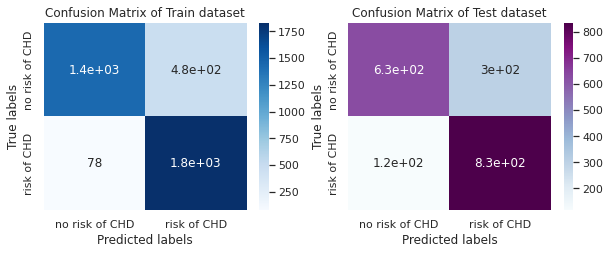

In [397]:
# Confusion matrix for train and test datasets.

plt.figure(figsize = (10,20))
sns.set_theme()
var_lsts= [y_train,y_train_predict_knn_cv,y_test, y_test_predict_knn_cv]

for var in enumerate(var_lsts):
  if var[0] == 0:
    ax  = plt.subplot(5,2,1)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Train Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,ax = ax,cmap="Blues") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Train dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)
  elif var[0] == 2:
    ax = plt.subplot(5,2,2)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Test Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,cmap="BuPu") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Test dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)

In [398]:
# Gaussian Naive Bayes on Random Over Sampled data

In [399]:
# creating an instance of the model
gnb_cv = GaussianNB()

# Model Fit
gnb_cv.fit(X_train,y_train)

GaussianNB()

In [400]:
# Get predicted probability
train_proba_preds = gnb_cv.predict_proba(X_train)[:,1]
test_proba_preds = gnb_cv.predict_proba(X_test)[:,1]

In [401]:
# Get the predicted classes

y_train_predict_gnb_cv = gnb_cv.predict(X_train)
y_test_predict_gnb_cv = gnb_cv.predict(X_test)

In [402]:
# Get the accuracy scores
train_accuracy = (accuracy_score(y_train,y_train_predict_gnb_cv))*100
test_accuracy = (accuracy_score(y_test,y_test_predict_gnb_cv))*100

print("The accuracy on train data is :", train_accuracy)
print("The accuracy on test data is  :", test_accuracy)

The accuracy on train data is : 58.45309642017246
The accuracy on test data is  : 57.45358090185676


The ROC AUC score on train data is          : 0.70977
The ROC AUC score on test data is           : 0.69653
The Precision Recall score on train data is : 0.68923
The Precision Recall score on test data is  : 0.6747
              precision    recall  f1-score   support

           0       0.54      0.90      0.68       935
           1       0.72      0.25      0.38       950

    accuracy                           0.57      1885
   macro avg       0.63      0.58      0.53      1885
weighted avg       0.63      0.57      0.53      1885



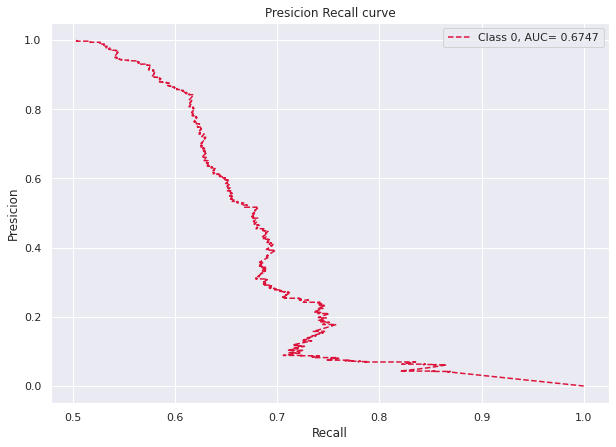

In [403]:
# Evaluation
# Get the 'ROC AUC' and 'Precision Recall' scores

# ROC AUC
train_roc_auc_score = roc_auc_score(y_train,train_proba_preds)
test_roc_auc_score = roc_auc_score(y_test,test_proba_preds)

print("The ROC AUC score on train data is          :", round(train_roc_auc_score,5))
print("The ROC AUC score on test data is           :", round(test_roc_auc_score,5))

# Precision Recall curve

precision_train, recall_train,_train = precision_recall_curve(y_train,train_proba_preds)
precision, recall,_ = precision_recall_curve(y_test,test_proba_preds)
  
# print(_)
auc_score_train = auc(recall_train, precision_train)
auc_score = auc(recall, precision)
print("The Precision Recall score on train data is :", round(auc_score_train,5))
print("The Precision Recall score on test data is  :", round(auc_score,5))

# Classification Report
print(classification_report(y_test,y_test_predict_gnb_cv))

# Presicion Recall curve

# plotting    
plt.figure(figsize=(10,7))
plt.plot(precision, recall, linestyle='--',color='crimson',label = ((f'Class 1, AUC= {round(auc_score,5)}')))
plt.title('Presicion Recall curve')
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.legend(loc='best')

Train Confusion Matrix :
[[1733  188]
 [1402  504]]
Test Confusion Matrix :
[[842  93]
 [709 241]]


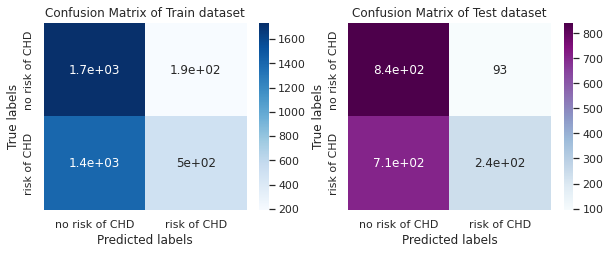

In [404]:
# Confusion matrix for train and test datasets.

plt.figure(figsize = (10,20))
sns.set_theme()
var_lsts= [y_train,y_train_predict_gnb_cv,y_test, y_test_predict_gnb_cv]

for var in enumerate(var_lsts):
  if var[0] == 0:
    ax  = plt.subplot(5,2,1)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Train Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,ax = ax,cmap="Blues") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Train dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)
  elif var[0] == 2:
    ax = plt.subplot(5,2,2)
    cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
    print('Test Confusion Matrix :')
    print(cm)
    sns.heatmap(cm, annot=True,cmap="BuPu") #annot=True to annotate cells
    labels = ['no risk of CHD', 'risk of CHD']
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of Test dataset')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    sns.set(font_scale = 1)

In [405]:
# from sklearn.svm import SVC
  
# # Building a Support Vector Machine on train data
# svc_model = SVC(C= .1, kernel='poly', gamma= 1)
# svc_model.fit(X_train, y_train)
  
# prediction = svc_model.predict(X_test)
# # check the accuracy on the training set
# print(svc_model.score(X_train, y_train))
# print(svc_model.score(X_test, y_test))

# Equal number of classes after Under sampling
rus_xy['TenYearCHD'].value_counts()

In [410]:
# Random under sampling has been tried with all the above models, but it leads to the huge information loss and ROC AUC score is not improved.